# UCI Adult income Dataset- Exploratory and Descriptive Analysis
This notebook is focused on the exploratory and descriptive analysis of the cleaned version of the UCI Adult income dataset

In [90]:
# Import libraries

import pandas as pd
import numpy as np
import os
import plotly.express as px

# Define and create paths

In [91]:
# Get working directory
current_dir = os.getcwd()
# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
# define paths to the data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
# Define paths to the results folder
results_dir  = os.path.join(project_root_dir, 'results')
# Define paths to the docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# create directories if they do not exist 
os.makedirs(raw_dir, exist_ok = True )
os.makedirs(processed_dir, exist_ok = True )
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Read in the data

In [92]:
adult_data_filename = os.path.join(processed_dir, "adult_cleaned.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,not-in-family,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,husband,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,not-in-family,white,male,0,0,40,<=50k,secondary-school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,husband,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,wife,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,wife,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,not-in-family,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,husband,white,male,0,0,45,>50k,secondary-school graduate,white collar,north america,46-60
8,31,private,45781,14,single,not-in-family,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,husband,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


## check the shape of the dataset and data types

In [93]:
adult_df.shape

(32515, 16)

In [80]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32515 entries, 0 to 32514
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32515 non-null  int64 
 1   workclass           32515 non-null  object
 2   fnlwgt              32515 non-null  int64 
 3   education_num       32515 non-null  int64 
 4   marital_status      32515 non-null  object
 5   relationship        32515 non-null  object
 6   race                32515 non-null  object
 7   sex                 32515 non-null  object
 8   capital_gain        32515 non-null  int64 
 9   capital_loss        32515 non-null  int64 
 10  hours_per_week      32515 non-null  int64 
 11  income              32515 non-null  object
 12  education_level     32515 non-null  object
 13  occupation_grouped  32515 non-null  object
 14  native_region       32515 non-null  object
 15  age_group           32515 non-null  object
dtypes: int64(6), object(10

## Summary Statistics

## Numerical Variables

In [94]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32515.000000,3.251500e+04,32515.000000,32515.000000,32515.000000,32515.000000
mean,38.590374,1.897912e+05,10.081593,1079.173428,87.427341,40.441089
std,13.638535,1.055766e+05,2.571943,7390.403187,403.231777,12.349830
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178300e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370475e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Categorical Variables

In [95]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,32515,32515,32515,32515,32515,32515,32515,32515,32515,32515
unique,7,4,6,5,2,2,7,5,6,7
top,private,married,husband,white,male,<=50k,secondary-school graduate,white collar,north america,26-35
freq,22652,14984,13178,27773,21760,24679,10485,16533,30019,8501


In [96]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696663
self-employed    0.112440
government       0.069414
local-gov        0.064370
unknown          0.056466
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [97]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460833
single                   0.327664
divorced or separated    0.180963
widowed                  0.030540
Name: proportion, dtype: float64

In [98]:
adult_df['relationship'].value_counts(normalize=True)

relationship
husband           0.405290
not-in-family     0.254775
own-child         0.155590
unmarried         0.105951
wife              0.048224
other-relative    0.030171
Name: proportion, dtype: float64

In [99]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854160
black                        0.096017
asian or pacific islander    0.031924
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income Distribution

In [100]:
adult_df_income = adult_df.groupby('income').size().reset_index(name = 'total')
adult_df_income

,income,total
0,<=50k,24679
1,>50k,7836


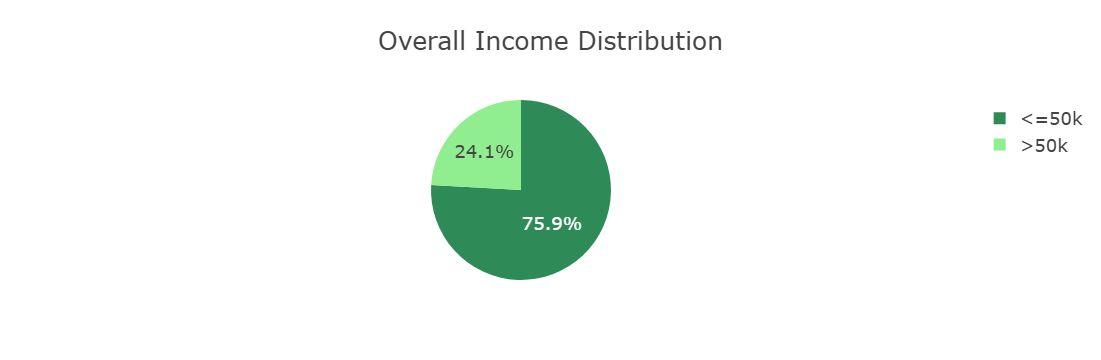

In [101]:
fig = px.pie(adult_df_income, names='income', values='total', title='Overall Income Distribution', color_discrete_sequence=['seagreen','lightgreen'])
fig.update_layout(template="presentation", paper_bgcolor="rgba(0, 0, 0, 0)", plot_bgcolor ="rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_pie_chart.html'))

## Income by Age Group

In [102]:
adult_df_income_age = adult_df.groupby(['age_group', 'income']).size().reset_index(name= 'total_by_age')
adult_df_income_age 

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5232
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [103]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group)*100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5333,97.907105
1,18-25,>50k,114,2.092895
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5232,65.375484
5,36-45,>50k,2771,34.624516
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


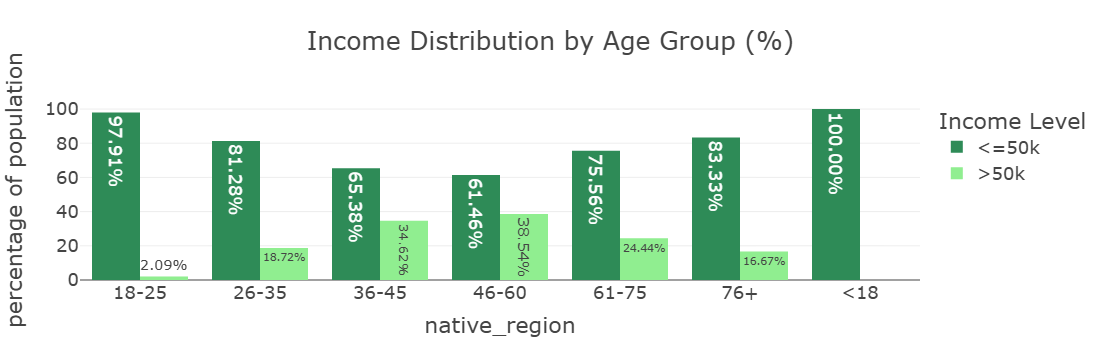

In [105]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title = 'Income Distribution by Age Group (%)',
    barmode = 'group',
    color_discrete_sequence=['seagreen','lightgreen'],
    text = 'percentage'
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_layout(template = "presentation", 
                  xaxis_title = 'native_region', 
                  yaxis_title = 'percentage of population', 
                  legend_title = dict(text='Income Level'), 
                  paper_bgcolor="rgba(0, 0, 0, 0)", 
                  plot_bgcolor ="rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by_agegroup_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by_agegroup_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by_agegroup_bar_plot.html'))

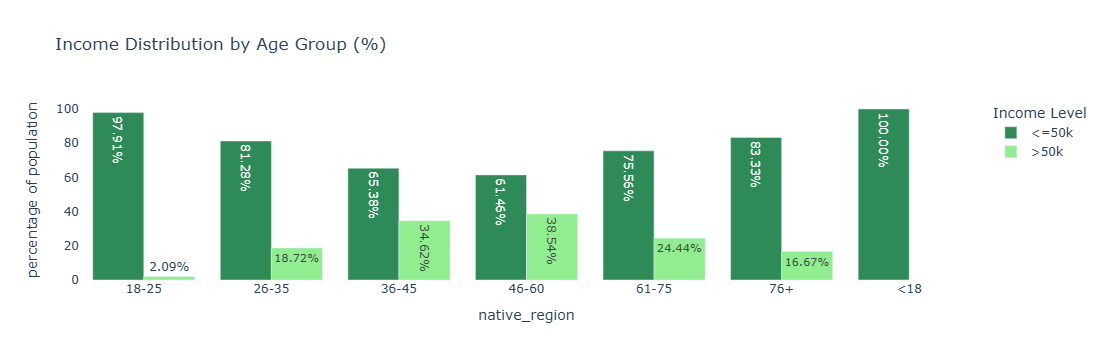

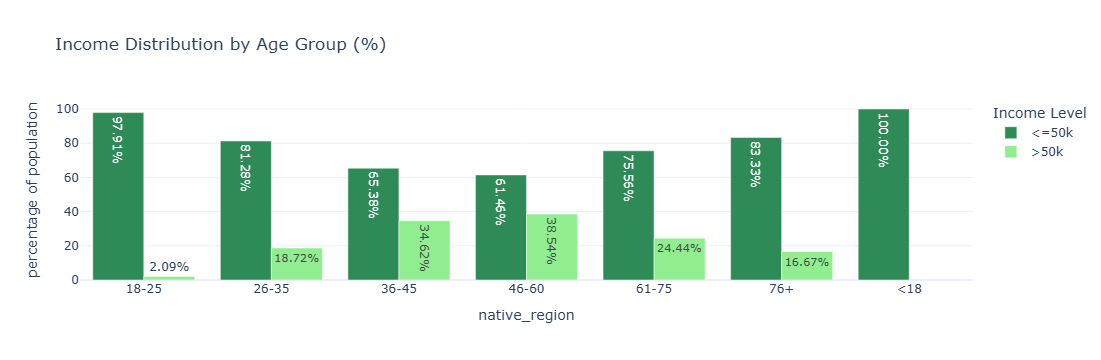

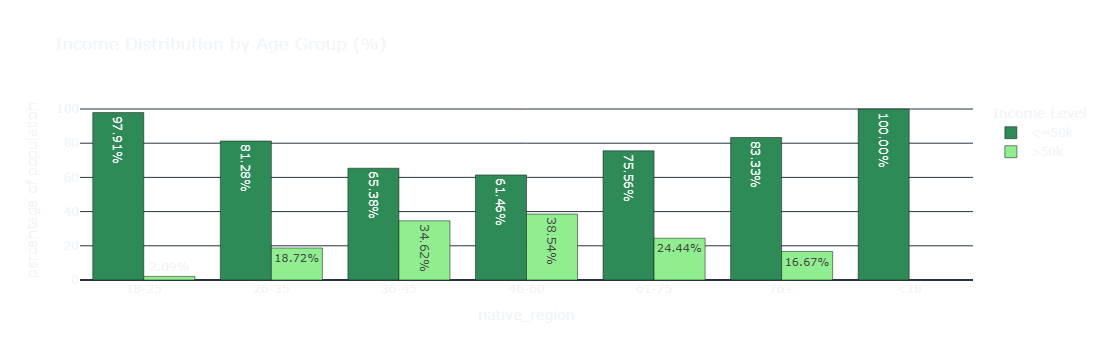

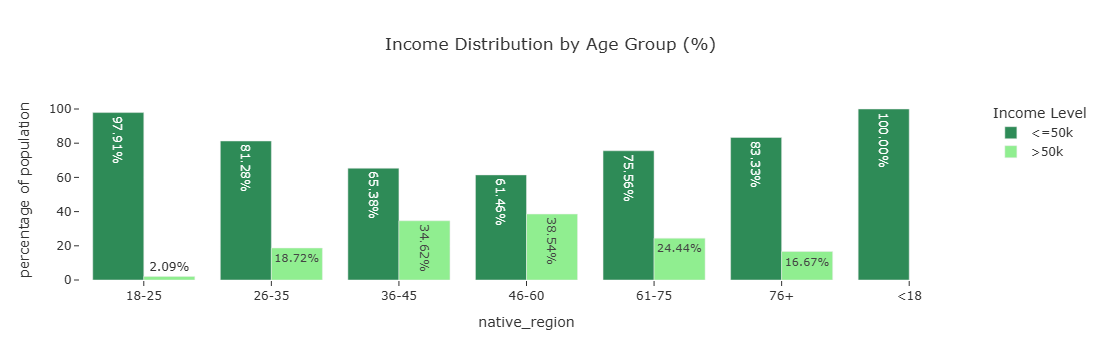

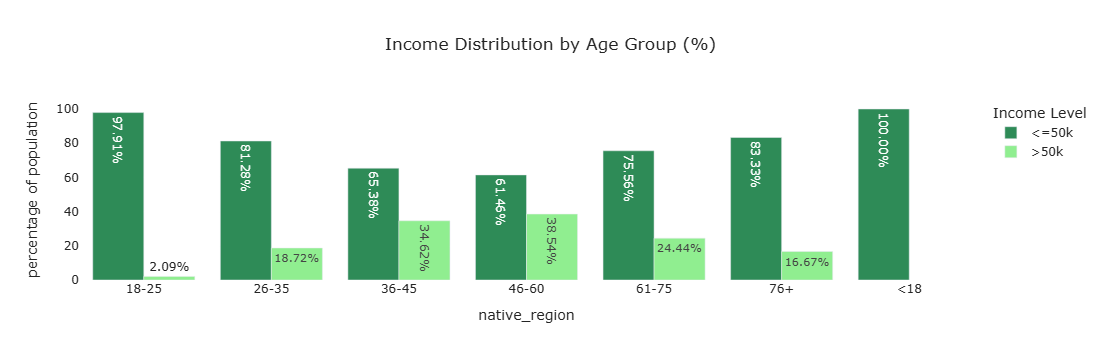

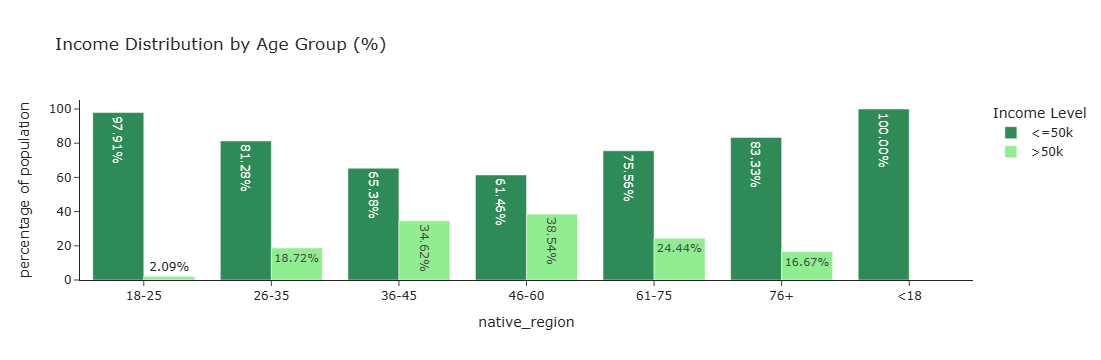

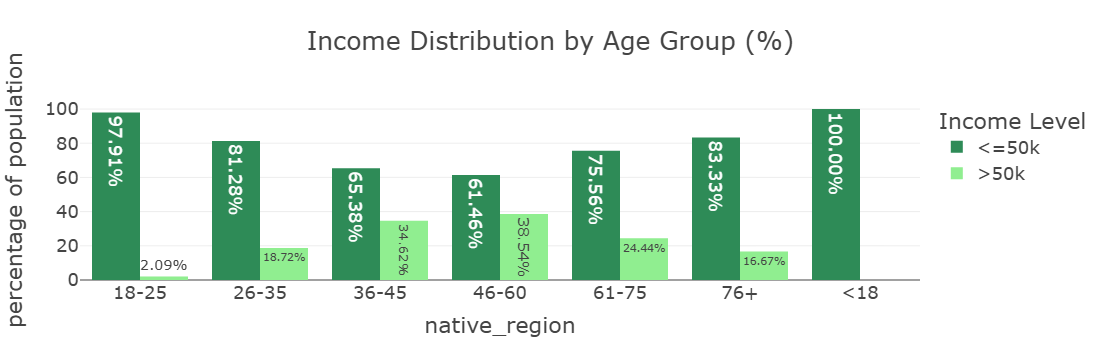

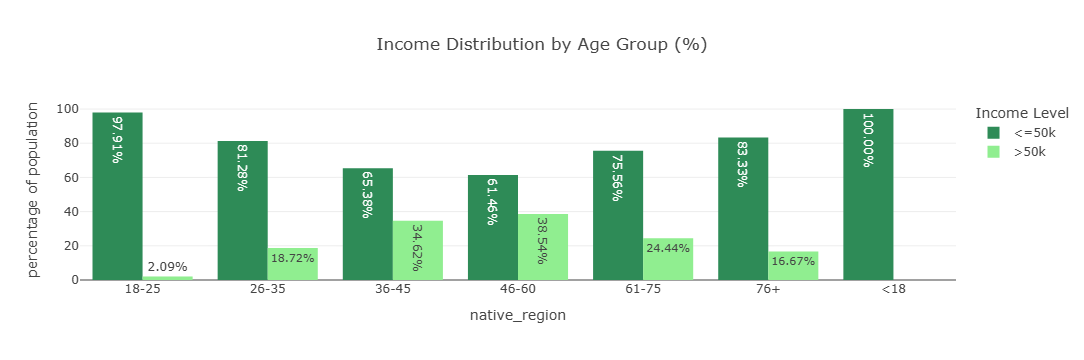

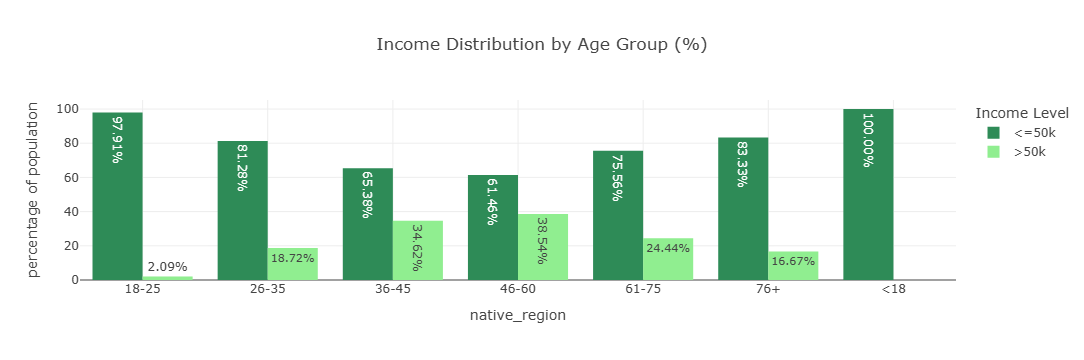

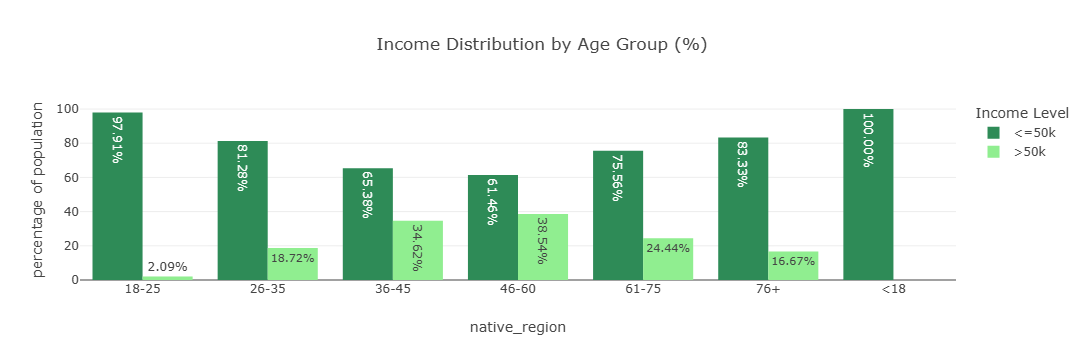

In [106]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "presentation", "xgridoff", "gridon", "none"]
for theme in themes:
  fig.update_layout(template=theme)

  fig.show()

# Income Distribution by native region

In [108]:
adult_df_income_reg = adult_df.groupby(['native_region', 'income']).size().reset_index(name= 'total_by_region')
adult_df_income_reg 

,native_region,income,total_by_region
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22769
7,north america,>50k,7250
8,other,<=50k,436
9,other,>50k,146


In [111]:
total_per_native_region = adult_df_income_reg.groupby('native_region')['total_by_region'].transform('sum')
adult_df_income_reg['percentage'] = (adult_df_income_reg['total_by_region']/total_per_native_region)*100
adult_df_income_reg

,native_region,income,total_by_region,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22769,75.848629
7,north america,>50k,7250,24.151371
8,other,<=50k,436,74.914089
9,other,>50k,146,25.085911


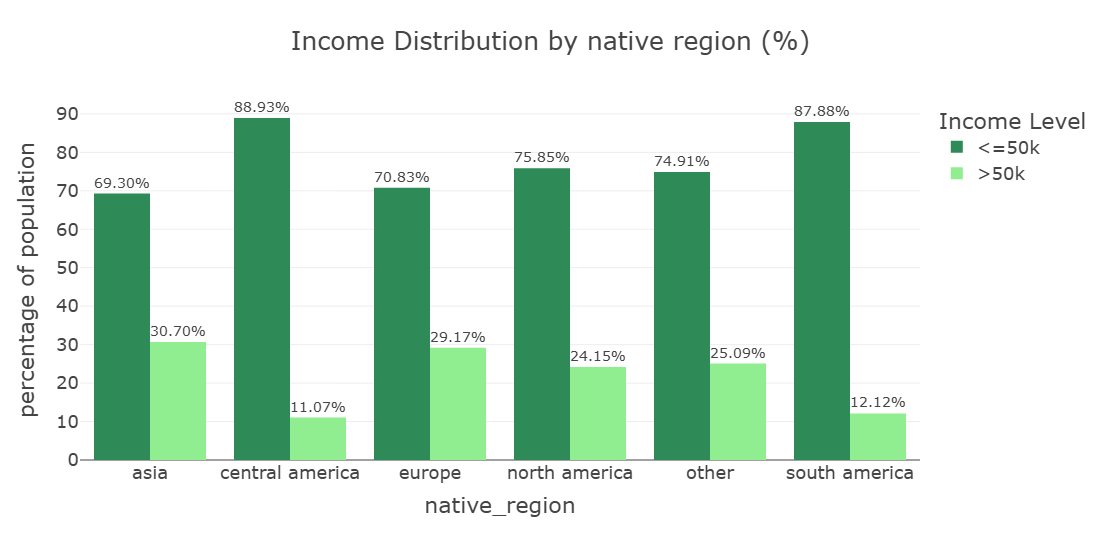

In [112]:
fig = px.bar(
    adult_df_income_reg,
    x = 'native_region',
    y = 'percentage',
    color = 'income',
    title = 'Income Distribution by native region (%)',
    barmode = 'group',
    height= 540,
    color_discrete_sequence=['seagreen','lightgreen'],
    text = 'percentage'
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition = 'outside')
fig.update_layout(template = "presentation", 
                  xaxis_title = 'native_region', 
                  yaxis_title = 'percentage of population', 
                  legend_title = dict(text='Income Level'), 
                 paper_bgcolor="rgba(0, 0, 0, 0)", 
                  plot_bgcolor ="rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by_nativeregion_bar_plot.html'))

# Income Distribution by Race

In [113]:
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name= 'total_by_race')
adult_df_income_race

,race,income,total_by_race
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20661
9,white,>50k,7112


In [114]:
total_per_race = adult_df_income_race.groupby('race')['total_by_race'].transform('sum')
adult_df_income_race['percentage'] = (adult_df_income_race['total_by_race']/total_per_race)*100
adult_df_income_race

,race,income,total_by_race,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20661,74.392395
9,white,>50k,7112,25.607605


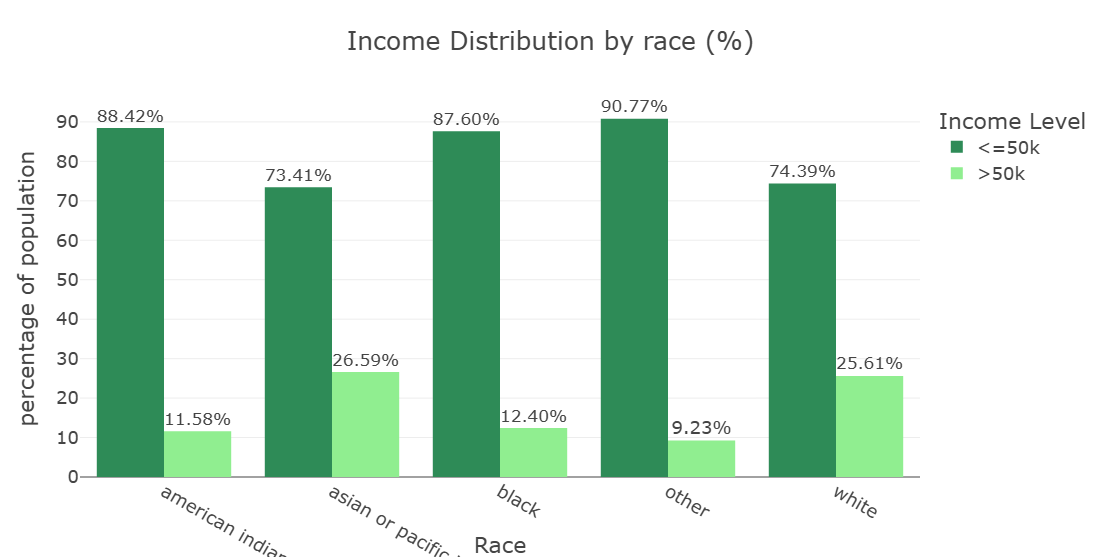

In [115]:
fig = px.bar(
    adult_df_income_race,
    x = 'race',
    y = 'percentage',
    color = 'income',
    title = 'Income Distribution by race (%)',
    barmode = 'group',
    height= 540,
    width= 1200,
    color_discrete_sequence=['seagreen','lightgreen'],
    text = 'percentage'
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition = 'outside')
fig.update_layout(template = "presentation", 
                  xaxis_title = 'Race', 
                  yaxis_title = 'percentage of population', 
                  legend_title = dict(text='Income Level'), 
                 paper_bgcolor="rgba(0, 0, 0, 0)", 
                  plot_bgcolor ="rgba(0, 0, 0, 0)")
fig.show()

# Income Distribution by Education Level and Ocuupation grouped

In [116]:
adult_df_income_edu_occ = adult_df.groupby(['education_level', 'occupation_grouped', 'income']).size().reset_index(name= 'total').sort_values('total', ascending = False)
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total
33,secondary-school graduate,blue collar,<=50k,3977
62,tertiary,white collar,>50k,3545
61,tertiary,white collar,<=50k,3369
51,some college,white collar,<=50k,3004
41,secondary-school graduate,white collar,<=50k,2900
...,...,...,...,...
30,secondary,unknown,>50k,5
20,primary,unknown,>50k,4
13,preschool,white collar,<=50k,3
26,secondary,military,>50k,2


In [117]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + " | " + adult_df_income_edu_occ['occupation_grouped'])
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total,edu_occ
33,secondary-school graduate,blue collar,<=50k,3977,secondary-school graduate | blue collar
62,tertiary,white collar,>50k,3545,tertiary | white collar
61,tertiary,white collar,<=50k,3369,tertiary | white collar
51,some college,white collar,<=50k,3004,some college | white collar
41,secondary-school graduate,white collar,<=50k,2900,secondary-school graduate | white collar
...,...,...,...,...,...
30,secondary,unknown,>50k,5,secondary | unknown
20,primary,unknown,>50k,4,primary | unknown
13,preschool,white collar,<=50k,3,preschool | white collar
26,secondary,military,>50k,2,secondary | military


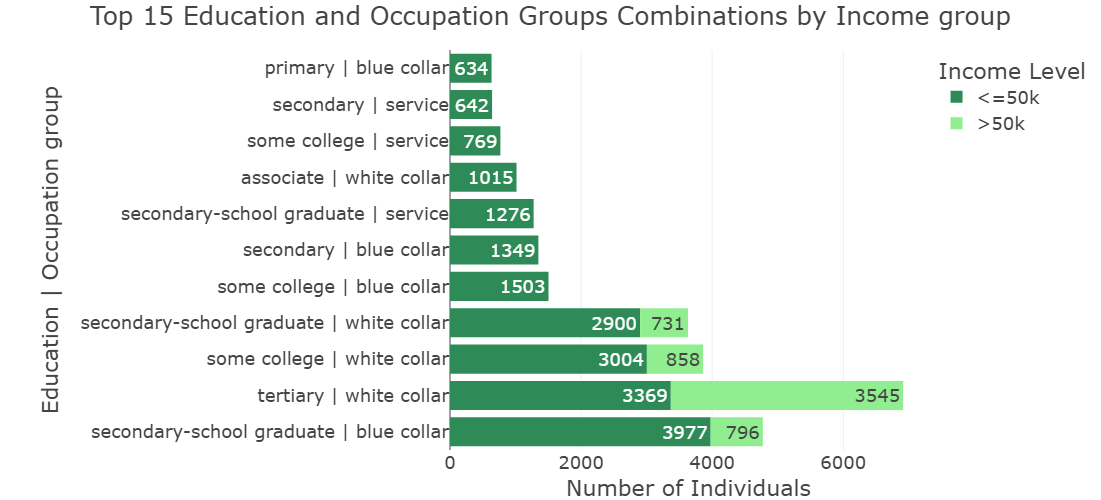

In [118]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)
fig = px.bar(
    adult_df_combos,
    x = 'total',
    y = 'edu_occ',
    color = 'income',
    orientation='h',
    title = f'Top {num} Education and Occupation Groups Combinations by Income group',
    #barmode = 'group',
    height= 500,
    width= 1100,
    color_discrete_sequence=['seagreen','lightgreen'],
    text = 'total'
)

fig.update_layout(template = "presentation", 
                  xaxis_title = 'Number of Individuals', 
                  yaxis_title = 'Education | Occupation group', 
                  legend_title = dict(text='Income Level'), 
                 margin = dict(l=450, r=50, t=50, b=50))
fig.update_traces(textposition = 'inside')
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by_eduandocc_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by_eduandocc_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by_eduandocc_bar_plot.html'))